In [ ]:
import scipy.io as sio
GOOGLE_COLAB = True

In [ ]:
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/', force_remount=True)
    path = '/content/drive/My Drive/Colab Notebooks/test_image/'
    
dataset = path+'Internship_memes'

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:

import pathlib
dataset_url = dataset
data_dir = pathlib.Path(dataset_url)

In [ ]:
data_dir

PosixPath('/content/drive/My Drive/Colab Notebooks/test_image/Internship_memes')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

793


In [ ]:
none_meme = list(data_dir.glob('non_memes/*'))
PIL.Image.open(str(none_meme[0]))

IsADirectoryError: ignored

In [ ]:

drake = list(data_dir.glob('drake_meme/*'))
PIL.Image.open(str(drake[0]))

IndexError: ignored

In [ ]:
old_man = list(data_dir.glob('old_man_meme/*'))
PIL.Image.open(str(old_man[0]))

IndexError: ignored

In [ ]:
kanye_west = list(data_dir.glob('kanye_west_meme/*'))
PIL.Image.open(str(kanye_west[0]))

IndexError: ignored

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1243 files belonging to 16 classes.
Using 995 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1243 files belonging to 16 classes.
Using 248 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bizwojak_meme', 'crab_rave_meme', 'doge_meme', 'doomer_meme', 'gigachad_meme', 'hide_the_pain_harold', 'i_know_that_feel_bro_wojak', 'non_memes', 'pepe_meme_face', 'reee_meme_reeeee', 'the_chad_chad_meme', 'trollface_meme', 'ugandan_knuckles_meme', 'virgin_walking_meme', 'withered_wojak_meme', 'yes_chad_meme']


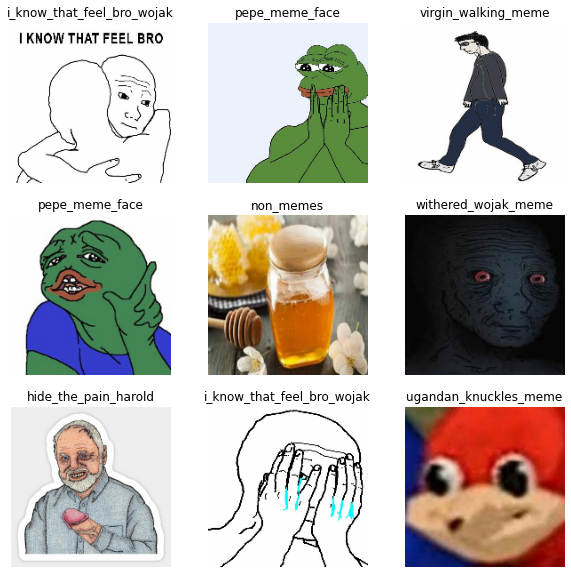

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 11s 92ms/step - loss: 2.6639 - accuracy: 0.3206 - val_loss: 2.0978 - val_accuracy: 0.4234
Epoch 2/10
32/32 [==============================] - 2s 51ms/step - loss: 1.7417 - accuracy: 0.4774 - val_loss: 1.5027 - val_accuracy: 0.5242
Epoch 3/10
32/32 [==============================] - 1s 46ms/step - loss: 1.0467 - accuracy: 0.6543 - val_loss: 1.1881 - val_accuracy: 0.6331
Epoch 4/10
32/32 [==============================] - 1s 47ms/step - loss: 0.6043 - accuracy: 0.8030 - val_loss: 0.8564 - val_accuracy: 0.7460
Epoch 5/10
32/32 [==============================] - 1s 46ms/step - loss: 0.3334 - accuracy: 0.8955 - val_loss: 0.7243 - val_accuracy: 0.7782
Epoch 6/10
32/32 [==============================] - 1s 46ms/step - loss: 0.2220 - accuracy: 0.9276 - val_loss: 0.8953 - val_accuracy: 0.7661
Epoch 7/10
32/32 [==============================] - 1s 46ms/step - loss: 0.1529 - accuracy: 0.9467 - val_loss: 0.9697 - val_accuracy: 0.7984
Epoch 8/10
3

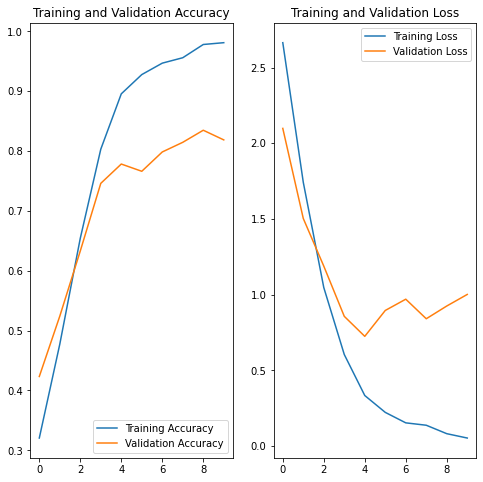

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

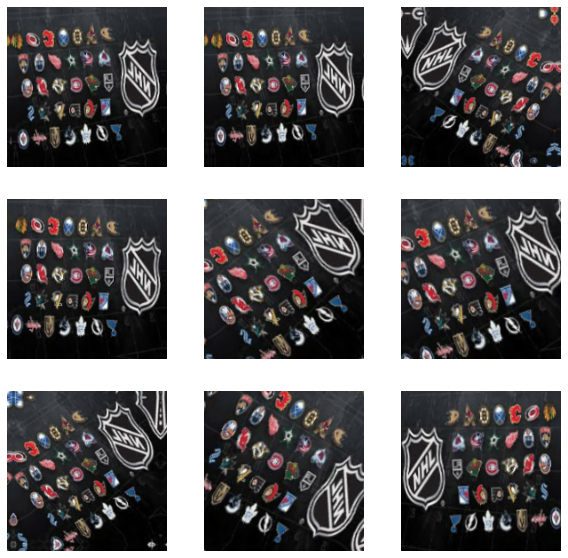

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
32/32 [==============================] - 5s 76ms/step - loss: 2.3943 - accuracy: 0.3236 - val_loss: 2.0665 - val_accuracy: 0.3992
Epoch 2/15
32/32 [==============================] - 2s 60ms/step - loss: 1.8248 - accuracy: 0.4653 - val_loss: 1.5891 - val_accuracy: 0.4677
Epoch 3/15
32/32 [==============================] - 2s 55ms/step - loss: 1.3902 - accuracy: 0.5497 - val_loss: 1.3238 - val_accuracy: 0.5444
Epoch 4/15
32/32 [==============================] - 2s 54ms/step - loss: 1.1526 - accuracy: 0.6271 - val_loss: 1.4518 - val_accuracy: 0.6089
Epoch 5/15
32/32 [==============================] - 2s 55ms/step - loss: 0.9973 - accuracy: 0.6774 - val_loss: 1.1408 - val_accuracy: 0.6290
Epoch 6/15
32/32 [==============================] - 2s 54ms/step - loss: 0.8367 - accuracy: 0.7246 - val_loss: 0.9537 - val_accuracy: 0.6694
Epoch 7/15
32/32 [==============================] - 2s 55ms/step - loss: 0.7762 - accuracy: 0.7508 - val_loss: 0.8741 - val_accuracy: 0.6694
Epoch 8/15
32

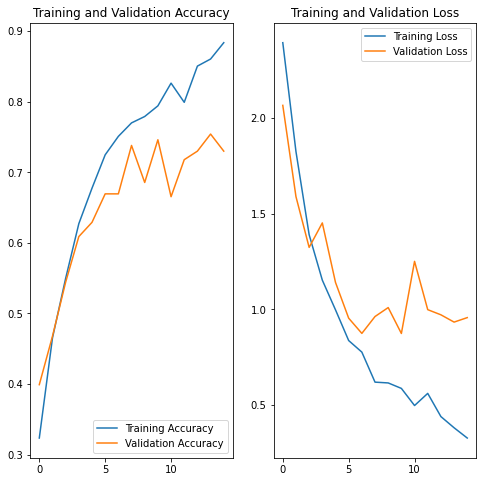

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/', force_remount=True)
    path = '/content/drive/My Drive/Colab Notebooks/'
    
dataset2 = path+'s3Image'

url = dataset2
s_path = pathlib.Path(url)

img = tf.keras.utils.load_img(
    s_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Mounted at /content/drive/
This image most likely belongs to non_memes with a 95.26 percent confidence.


In [ ]:
s_path

PosixPath('/content/drive/My Drive/Colab Notebooks/test_Feb17')

In [ ]:
from os import listdir
from PIL import Image as PImage

In [ ]:
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/', force_remount=True)
    path = '/content/drive/My Drive/Colab Notebooks/test_Feb17/'




def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

# your images in an array
imgs = loadImages(path)

for img in imgs:
    s_path = pathlib.Path(path)

    tf.keras.preprocessing.image.DirectoryIterator(
    path, s_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
    )



Mounted at /content/drive/
Found 0 images belonging to 0 classes.


ValueError: ignored